## FILM INDUSTRY ANALYSIS

* Author: Joan Kabura Njoroge
* Course: Data Science Full Time
* Scduled project review date/time: May 28, 2021
* Instructor name: Mark Tiba
* Blog post URL:

# 1. BUSINESS UNDERSTANDING
### 1.1. Business problem:
Microsoft wants to get in on the fun of huge firms producing original video content. Although they don't have any experience making movies, they have chosen to start a new film production company.My task is to research the categories of movies that are currently performing the best at the box office. I'll then turn those discoveries into useful information that the CEO of Microsoft's new film company may use to select what kinds of movies to make.

### 1.2. Success Indicator:
1. Who are the prospective rival companies doing business at the moment?
2. How are the domestic and international markets similar?
3. Which movie genres are now making the most money at the box office?
4. Does a movie's running time have an impact on how well it does financially and how    popular it is?
5. What categories are most popular right now?

# 2. DATA UNDERSTANDING
# 2.1. Importing the relevant packages


In [183]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

# 2.2. Reading the datasets


In [184]:
import sqlite3
conn = sqlite3.connect('Data/im.db')

imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [185]:
movie_gross_df = pd.read_csv('Data/bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [186]:
movie_info_df = pd.read_table('Data/movie_info.tsv', index_col=0)
movie_info_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [187]:
reviews_df = pd.read_table('Data/reviews.tsv', index_col=0, encoding='windows-1252')

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [231]:
tmdb_movies_df = pd.read_csv('Data/tmdb_movies.csv', index_col=0)
tmdb_movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [189]:
tn_movie_budgets_df = pd.read_csv('Data/tn_movie_budgets.csv', index_col=0)
tn_movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# 2.3 Exploring the datasets

## 2.3.1. Data Undrstanding
First, we look into the different tables in the imdb database.
* Directors table

In [190]:
# one movie can have multiple directors
# query the db for directors table
q = """
SELECT *
FROM directors
;
"""
directors = pd.read_sql(q, conn)
directors.tail(3)

,movie_id,person_id
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
291173,tt9004986,nm4993825


In [222]:
# query the db for known_for table
q = """
SELECT *
FROM movie_akas
;
"""
movie_akas = pd.read_sql(q, conn)
movie_akas.isna().sum(0)

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

Findings about the directors table:
1. movie_id is the primary key
2. one movie_id can have multiple person_id i.e multiple directors

* Persons table

In [192]:
# query the db for persons table
q = """
SELECT *
FROM persons
;
"""
persons = pd.read_sql(q, conn)
persons.tail()

,person_id,primary_name,birth_year,death_year,primary_profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [193]:
persons.nunique()

person_id             606648
primary_name          577203
birth_year               267
death_year               214
primary_profession      8647
dtype: int64

In [194]:
persons[persons['primary_name'].duplicated()].sort_values(by = 'primary_name')

,person_id,primary_name,birth_year,death_year,primary_profession
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor"
387377,nm8956236,A. Venkatesh,NaN,NaN,producer
436444,nm6758318,A.J. Khan,NaN,NaN,producer
565680,nm7645047,A.K. Azad,NaN,NaN,"music_department,composer"
...,...,...,...,...,...
290560,nm3216359,Óscar Pérez,NaN,NaN,"producer,director,writer"
446899,nm7114545,Özer Kiziltan,NaN,NaN,cinematographer
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer


In [195]:
persons['primary_profession'].str.contains('director').sum()

146033

In [196]:
# query the db for principals table
q = """
SELECT *
FROM principals
;
"""
principals = pd.read_sql(q, conn)
principals.head(3)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None


Findings about the persons table:
1. person_id is the primary key of the persons table
2. person_id is the foreign key of the directors, principals table.
3. the same name has been used on multiple person_id and profession, suggesting that one person may have played different roles in different movies. THough we are only interested in the director profession which appears 146033 times

APPROACH:
the directors table and persons table can be useful in determining the highest rated directors using the person_id

* Movie_basics table

In [197]:
q = """
SELECT *
FROM movie_basics
;
"""
movie_basics = pd.read_sql(q, conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [198]:
# fins all the years in the table
# see if they are valid formats
movie_basics.start_year.unique()


array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

We can see that there are more entries in the movie_id column than the primary_title column. Suggesting that there may be some movies repeated 

In [199]:
movie_basics[movie_basics['primary_title'].duplicated()].tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146053,tt9903716,Jessie,Jessie,2019,106.0,"Horror,Thriller"
146068,tt9905256,The Cross,The Cross,2012,NaN,Thriller
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary
146106,tt9910778,DK Bose,DK Bose,2019,117.0,Comedy
146117,tt9913418,Fragments,Fragments,2019,NaN,"Drama,Mystery,Sci-Fi"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [200]:
movie_basics[movie_basics['primary_title'] == 'Albatross']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
9094,tt1541149,Albatross,Albatross,2011,90.0,Drama
53042,tt3128706,Albatross,Albatross,2015,89.0,"Comedy,Drama,Sport"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary


In [201]:
movie_basics[movie_basics['primary_title'] == 'The Rehearsal']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
99621,tt5820812,The Rehearsal,The Rehearsal,2016,102.0,Drama
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [202]:
movie_basics[movie_basics['primary_title'] == 'Bacchanalia']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
53806,tt3167458,Bacchanalia,Bacchanalia,2017,101.0,"Comedy,Horror"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"


Findings about the movie_basics table:
1. Primary key: movie_id
2. Foreign Key: movie_id linking to the directors table.
3. It is confirmed that there are duplicate entries in the primary_title column with different movie_ids, start_year, runtime_minutes and genres.
4. One major problem with the duplicate primary_titles is that the start_year are different on different rows and would be hard to determine which start_year should be used in analyses.
5. the start year also seems to have entries in future dates. Such data can be regarded as false and is necessary to be dropped
6. Some movies have multiple genres. Can be important to consider when determining the most profitable genre. We can split the text.




*  Movie_ratings table

In [203]:
# query the db for movie_ratings table
q = """
SELECT *
FROM movie_ratings
;
"""
movie_ratings = pd.read_sql(q, conn)
movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [204]:
# search for duplicate rows. 
print(movie_ratings.duplicated().sum())


0


In [205]:
movie_basics[movie_basics['movie_id'] == 'tt9894098']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
145992,tt9894098,Sathru,Sathru,2019,129.0,Thriller


In [206]:
directors[directors['movie_id'] == 'tt9894098']

,movie_id,person_id
141058,tt9894098,nm10529107


In [207]:
# here we confirm the relationship between the movie_basic,directors, persons, movies_basics tables
persons[persons['person_id'] == 'nm10529107']


,person_id,primary_name,birth_year,death_year,primary_profession
50054,nm10529107,Naveen Nanjundan,NaN,NaN,director


Findings about the movie_ratings table:
1. Primary Key: movie_id
2. Foreign Key: movie_id linking to the directors, principals and movie_basics tables
3. average rating may be used to estimate popularity of each film.

# 3. DATA PREPARATION by merging and cleaning the different tables
This section describes various steps to clean the data to answer specific questions and as such will highlight the question to be investigated, datasets used and ends with a summary of inferences made for each question

In [208]:
# first we will merge the differnt tables

movie_table_q = """
SELECT 
    movie_id,
    primary_title AS title,
    start_year,
    runtime_minutes ,
    genres,
    averagerating AS avg_rating,
    numvotes

FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
"""
moviesTable = pd.read_sql(movie_table_q, conn)
moviesTable.head(10)

,movie_id,title,start_year,runtime_minutes,genres,avg_rating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [209]:
# join the tables principals,  to get specific directors 
directors_table_query = """
SELECT 
    movie_id,
    primary_name AS director
FROM principals
JOIN persons
    USING(person_id)
WHERE category = 'director'

;
"""
directorsTable = pd.read_sql(directors_table_query,conn)
directorsTable.head(3)

,movie_id,director
0,tt0111414,Frank Howson
1,tt0323808,Robin Hardy
2,tt0417610,Alejandro Chomski


In [210]:
directorsTable = directorsTable.drop_duplicates()

In [211]:

directorsTable = directorsTable.groupby('movie_id')['director'].apply(list)
directorsTable.head()


movie_id
tt0063540              [Harnam Singh Rawail]
tt0066787                        [Mani Kaul]
tt0069049                     [Orson Welles]
tt0069204             [Hrishikesh Mukherjee]
tt0100275    [Raoul Ruiz, Valeria Sarmiento]
Name: director, dtype: object

One movie can have multiple directors and would be useful to put all directors of a movie based on movie_id as a list


In [212]:
actors_table_query = """
SELECT 
    movie_id,
    primary_name AS actor
FROM principals
JOIN persons
    USING(person_id)
WHERE category = 'actor'
;
"""
actorsTable = pd.read_sql(actors_table_query, conn)

actorsTable = actorsTable.drop_duplicates()

actorsTable = actorsTable.groupby('movie_id')['actor'].apply(list)
actorsTable.head()


movie_id
tt0063540       [Dilip Kumar, Balraj Sahni, Sanjeev Kumar]
tt0066787                      [Arun Khopkar, Om Shivpuri]
tt0069049                 [John Huston, Peter Bogdanovich]
tt0069204    [Rabi Ghosh, Vijay Arora, Asrani, Utpal Dutt]
tt0100275                  [Luis Alarcón, Francisco Reyes]
Name: actor, dtype: object

In [234]:
imdb_table1 = pd.merge(moviesTable, directorsTable, how='left', on='movie_id')

imdb_Table = pd.merge(imdb_table1, actorsTable, how='left', on='movie_id')

imdb_and_tmdb_merged_Table = pd.merge(imdb_table2, tmdb_movies_df, how='left', on='title')
imdb_and_tmdb_merged_Table.isna().sum()

movie_id_x                0
title                     0
start_year                0
runtime_minutes       12900
genres                 1419
avg_rating                0
numvotes                  0
director              12093
actor                 27926
movie_id_y             4102
ordering               4102
region                40832
language             140493
types                 85981
attributes           160610
is_original_title      4106
genre_ids             86257
id                    86257
original_language     86257
original_title        86257
popularity            86257
release_date          86257
vote_average          86257
vote_count            86257
dtype: int64

In [214]:
# fill NaN runtime rows with the median 
imdb_Table['runtime_minutes'].fillna(imdb_Table['runtime_minutes'].median(), inplace = True)
imdb_Table.head()


,movie_id,title,start_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,[Harnam Singh Rawail],"[Dilip Kumar, Balraj Sahni, Sanjeev Kumar]"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,[Mani Kaul],"[Arun Khopkar, Om Shivpuri]"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Orson Welles],"[John Huston, Peter Bogdanovich]"
3,tt0069204,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,[Hrishikesh Mukherjee],"[Rabi Ghosh, Vijay Arora, Asrani, Utpal Dutt]"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Raoul Ruiz, Valeria Sarmiento]","[Luis Alarcón, Francisco Reyes]"


In [215]:
# drop rows whose start year are future dates > 2024
imdb_Table.drop(imdb_Table[imdb_Table.start_year > 2024].index, inplace = True)




In [216]:
imdb_Table.start_year.unique()

array([2013, 2019, 2018, 2017, 2010, 2011, 2012, 2015, 2016, 2014],
      dtype=int64)

In [229]:
imdb_Table[imdb_Table['title'].duplicated()].tail(10)

,movie_id,title,start_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
73796,tt9866700,Paranormal Investigation,2018,92.0,"Horror,Thriller",4.1,600,[Franck Phelizon],"[Jose Atuncar, Claudine Bertin, Cedric Henquez..."
73803,tt9875554,Alaska,2019,91.0,Drama,5.2,6,[Pedro Novaes],[Rafael Sieg]
73813,tt9882084,Chasing Happiness,2019,96.0,Documentary,8.1,632,[John Taylor],NaN
73815,tt9886934,The Projectionist,2019,81.0,Documentary,7.0,5,NaN,NaN
73816,tt9887130,The Human Comedy,2019,91.0,Comedy,3.2,17,[Zhou Sun],"[Lun Ai, Shih-Chieh King, Nuo Lu, Simon Yam]"
73832,tt9899880,Columbus,2018,85.0,Comedy,5.8,5,[Hatef Alimardani],"[Farhad Aslani, Majid Salehi, Saeed Poursamimi]"
73836,tt9903716,Jessie,2019,106.0,"Horror,Thriller",8.5,100,[Aswani Kumar V.],"[Abhinav Gomatam, Vimal Krishna]"
73845,tt9906218,Unstoppable,2019,84.0,Documentary,8.1,8,[Nick Willing],NaN
73853,tt9914642,Albatross,2017,91.0,Documentary,8.5,8,[Chris Jordan],NaN
73855,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11,[Joost van der Wiel],NaN


The imdb table currently has duplicate values for the title column to deal with this i have opted to merge the movie_akas table to the imdb_table which will check if a title is the original title that is in in movie_akas

,movie_id,title,start_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
54981,tt5581790,Jessie,2016,123.0,"Drama,Romance",6.5,11,[Pawan Wadeyar],"[Dhananjay, Raghu Mukherjee]"
73836,tt9903716,Jessie,2019,106.0,"Horror,Thriller",8.5,100,[Aswani Kumar V.],"[Abhinav Gomatam, Vimal Krishna]"


# 4. Data ANALYSIS

# Q1. Is there a correlation between the runtime and the rating?
Here we would like to determine the if the optimal length range of a movie for it to be more popular.

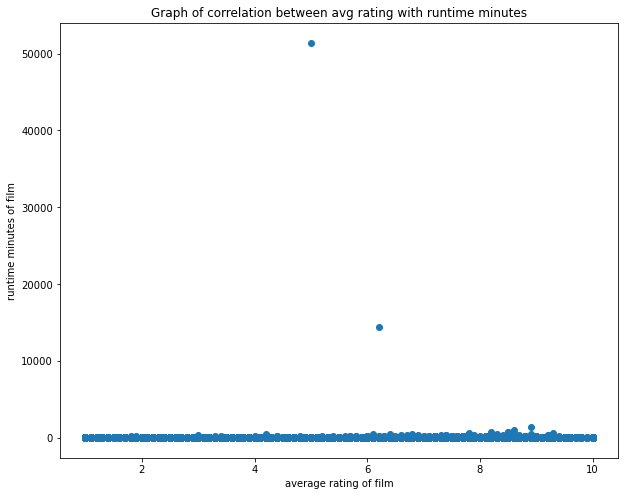

In [217]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(imdb_Table.avg_rating, imdb_Table.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Graph of correlation between avg rating with runtime minutes')
plt.show()

It is evident that the data contains some outliers and would require further research into the nature of these films.

In [218]:
imdb_Table.loc[imdb_Table['runtime_minutes'] > 10000]

,movie_id,title,start_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
27683,tt2659636,Modern Times Forever,2011,14400.0,Documentary,6.2,69,"[Bjornstjerne Reuter Christiansen, Jakob Fenge...",[Nicolas Gaitan]
70280,tt8273150,Logistics,2012,51420.0,Documentary,5.0,17,"[Daniel Andersson, Erika Magnusson]",NaN


Documentaries can be longer than most other genres and as such can be justified to be a valid point in the graph. We can still deal with these values by using the data in the 90th percentile

In [219]:
runtime_and_rating_no_outliers = imdb_Table.loc[imdb_Table['runtime_minutes'] < imdb_Table['runtime_minutes'].quantile(0.9)]  


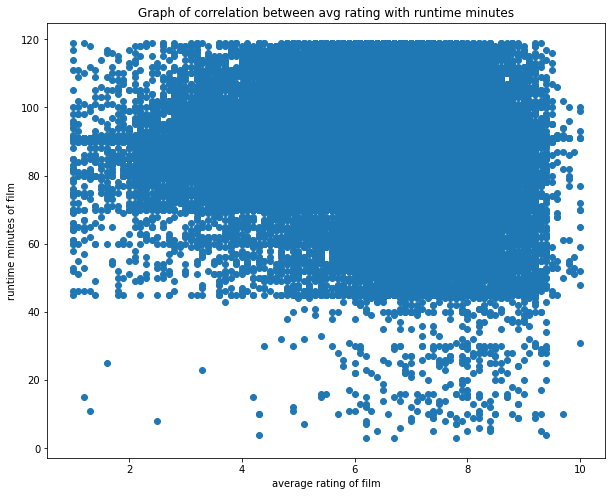

In [220]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(runtime_and_rating_no_outliers.avg_rating, runtime_and_rating_no_outliers.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Graph of correlation between avg rating with runtime minutes')
plt.show()

It is evident that movies having a runtime of 60 minutes up to 120 minutes. Generally had a higher rating hence more popular length of a film.

# Q2. What are the best rated genres?
Some of the genres column have multiple values separated by commas. It would be necessary to put them into separate columns before grouping them into their genre bins.

# Q3: Which director has a history of average rating across

In [221]:
# We want to maintain all records, regardless of whether they receive a rating, thus we left join movie_ratings.
# Because we wish to maintain all documents, whether or not they have a director, we left join directors.
# Because we DO NOT want the individuals who are NOT directors in the dataset, we used inner join persons.

